# **Creating an Augmented Dataset**

## *1. Dataset Loading and Preprocessing*

We want to create an augmented dataset from the train dataset. It will consist of normal data, sligltly modified, rotated, zoomeid in etc.It will be 3-4 times bigger than the original train dataset.

### **1.1. Importing Required Libraries**

#### **File Handling & Data Processing**
- `Path`, `os`, `shutil`: Handle file and directory operations.
- `pandas`, `numpy`: Provide tools for data manipulation.
- `pickle`: Serializes and saves Python objects.

#### **Image Processing**
- `PIL.Image`: Handles image loading and processing.
- `torchvision.transforms`: Applies transformations like resizing and normalization.

#### **Deep Learning with PyTorch**
- `torch`: Core PyTorch library for tensor computation and model building.
- `torchvision`: Provides datasets, pre-trained models, and utilities.
- `resnet50, ResNet50_Weights`: Loads the ResNet-50 model with pre-trained weights.



In [2]:
import math
import numpy as np
import scipy
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from matplotlib.pyplot import imshow


c:\Users\peppe\anaconda3\envs\MVTEC_torch_py310_20250114\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### **1.2. Dataset Loading and Preprocessing**


This section covers loading the dataset from directories, defining categories, and applying preprocessing transformations.


####  **Dataset Directory Setup**:
  - The dataset directory path is defined dynamically relative to the script's location.
  - The checkpoint directory is also created to save model checkpoints.
  
####  **Categories**:
  - A list of categories is defined. These categories represent different object types like "bottle," "capsule," "screw," etc.

####  **Image Transformation**:
  - A transformation pipeline is defined using `torchvision.transforms.Compose`. The images are resized to 224x224 pixels and converted into PyTorch tensors. This ensures that all images are of the same size and normalized between [0, 1].

####  **Loading Datasets**:
  - The `ImageFolder` class from `torchvision.datasets` is used to load the dataset for both training and testing.
  - Each category has its own subfolder, and within each subfolder, there are separate "train" and "test" directories.
  - The train and test datasets are stored in dictionaries (`train_datasets_dict` and `test_datasets_dict`), indexed by category.
  

In [3]:
# Load the dataset
dataset_dir = os.path.join(os.path.dirname(os.path.abspath("__file__")), "..\..\..\Dataset")
dataset_dir = os.path.normpath(dataset_dir)
# Define the checkpoint file path
checkpoint_dir = os.path.join(os.path.dirname(os.path.abspath("__file__")), 'Checkpoints')
os.makedirs(checkpoint_dir, exist_ok=True)

### **1.3. Directory and Category Definition**

The dataset directory and categories are set up and used for loading specific subsets of data.

####  **Define Dataset Paths**:
  - Paths for training and test images for each category are generated dynamically using the base dataset directory.
####  **Categories**:
  - Categories of objects to be classified are predefined (e.g., "bottle," "carpet," "tile").
  - The `categories` list defines all possible object types for the dataset.

In [4]:
# define the categories
categories = [
    "bottle",
    "cable",
    "capsule",
    "carpet",
    "grid",
    "hazelnut",
    "leather",
    "metal_nut",
    "pill",
    "screw",
    "tile",
    "toothbrush", 
    "transistor",
    "wood",
    "zipper"
]

min_categories = 0
max_categories = 3

## *2. Custom Data Augmentation with Display of Random Augmented Images*

This code applies a series of custom augmentations to images in a dataset. The augmentations include transformations like rotation, scaling, and Gaussian blur, among others. The goal is to apply these augmentations randomly to the dataset and visualize a few augmented images in a grid format to observe the effects.

#### 1. **Custom Rotation Class**:
   - The `Rotate` class allows us to randomly rotate an image by a specified set of angles. This is part of the augmentation pipeline.
   - The rotation angles are configurable (`angles=[90, 180]` by default).
   
#### 2. **Augmentation Pipeline**:
   - A series of transformations are defined using `transforms.Compose()`. These transformations are applied to each image before it is returned.
   - The augmentations applied include:
     - **Resize**: Resizes the image to a fixed shape of (224, 224).
     - **Random Horizontal Flip**: Flips the image horizontally with a probability of 50%.
     - **Random Affine Transformation**: Applies random scaling and translation to the image.
     - **Random Rotation**: Rotates the image by randomly chosen angles from the specified list (`[-90, 90, 180]`).
     - **Gaussian Blur**: Applies Gaussian blur to the image with a random sigma value between 0.01 and 0.05.
     - **ToTensor**: Converts the image to a PyTorch tensor before it is batched.
   
#### 3. **Display Function for Augmented Images**:
   - `display_random_augmented_images` function loads a random sample of images from the dataset directory, applies the augmentation pipeline to each image, and then displays them in a grid.
   - The function:
     - Loads images from the specified directory (`train_image_path`).
     - Applies the augmentation pipeline to each image.
     - Displays the images in a grid using `matplotlib.pyplot.subplots()`.
     - Ensures unused subplots are hidden in the figure for cleaner visualization.
   
#### 4. **Example Usage**:
   - The code uses the `display_random_augmented_images` function to show augmented images for each category in the dataset.



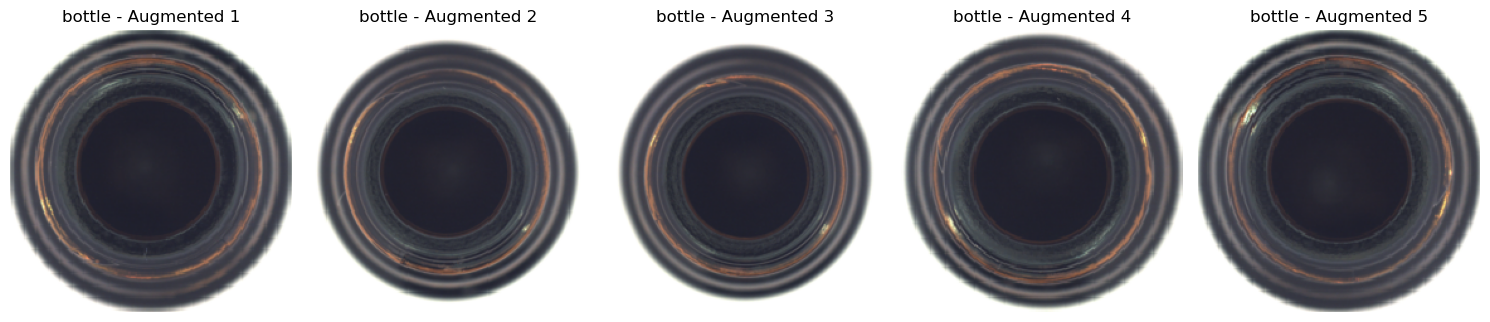

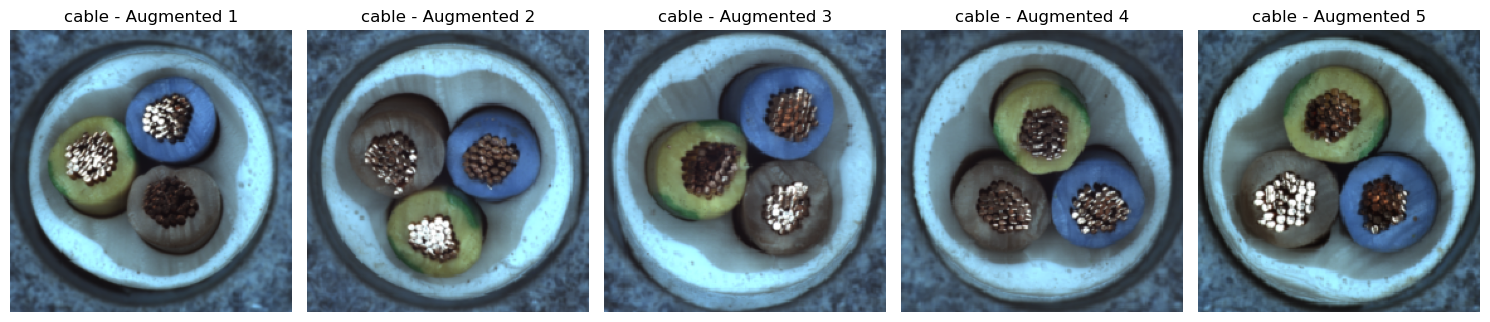

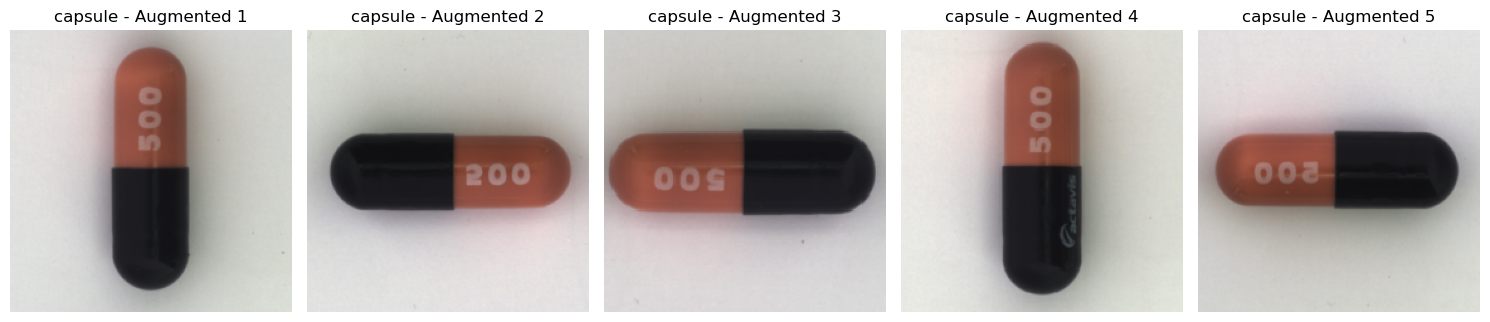

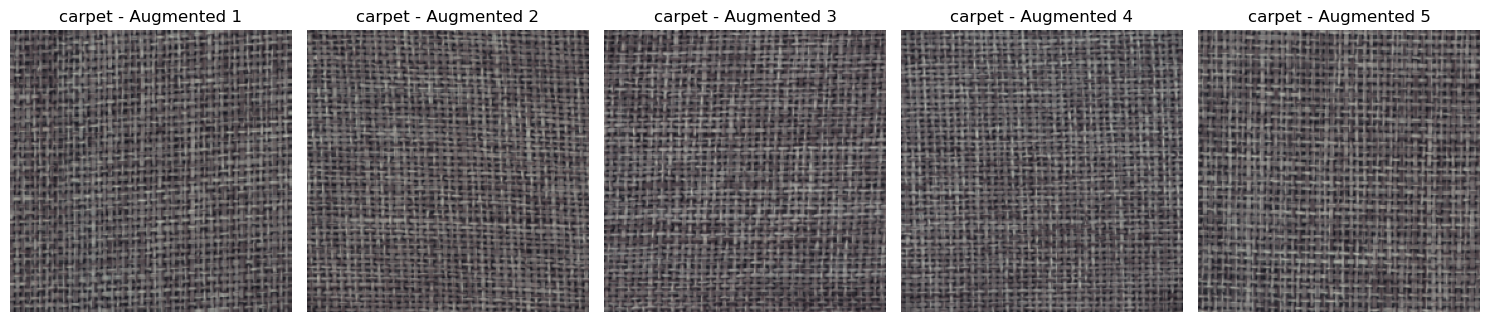

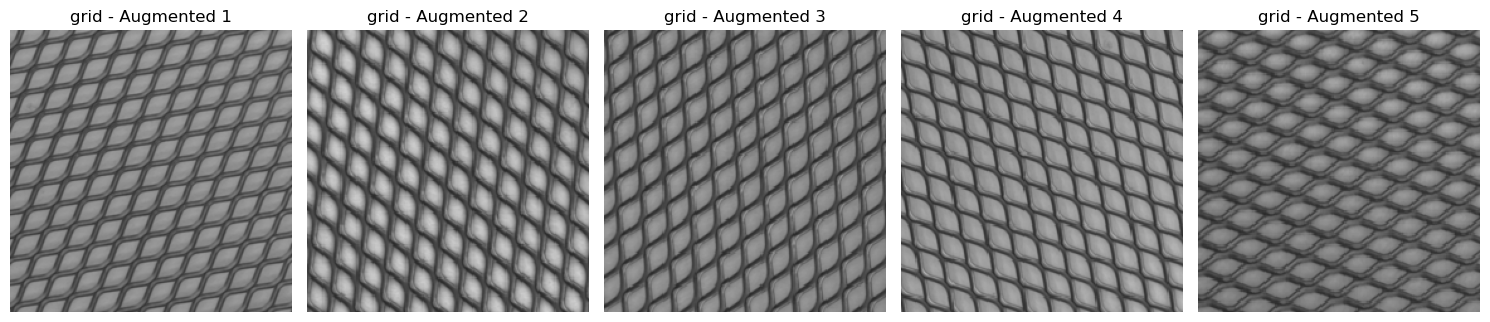

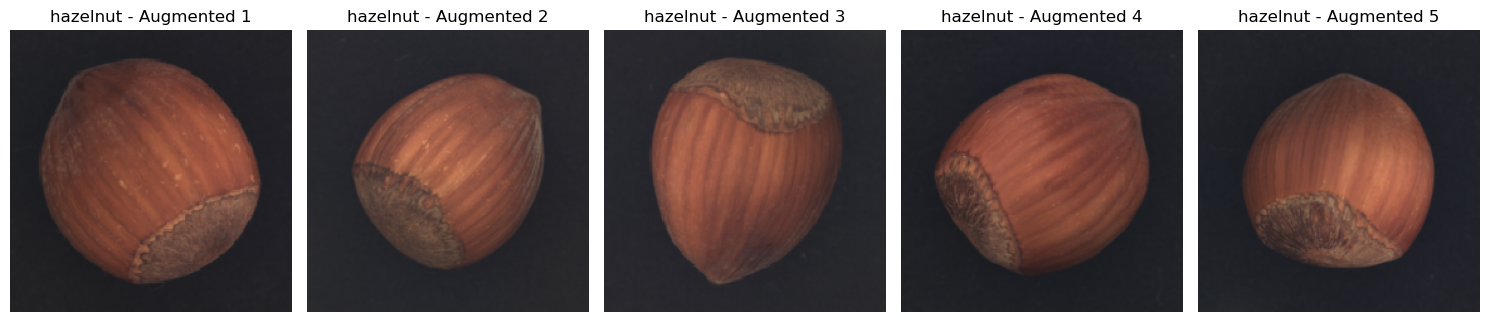

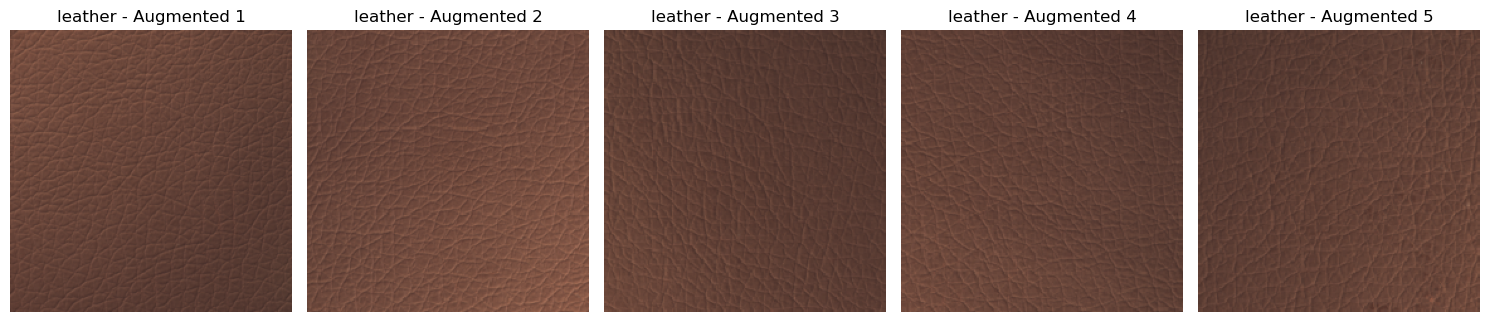

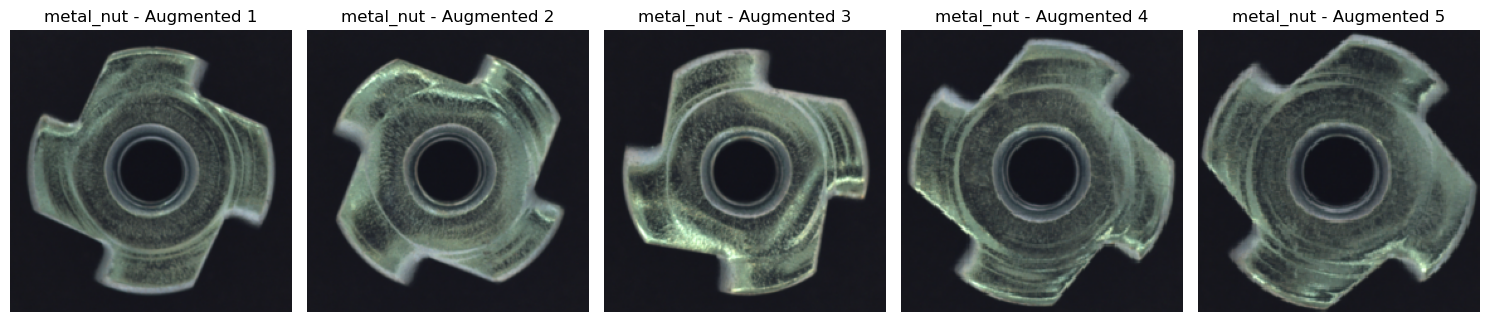

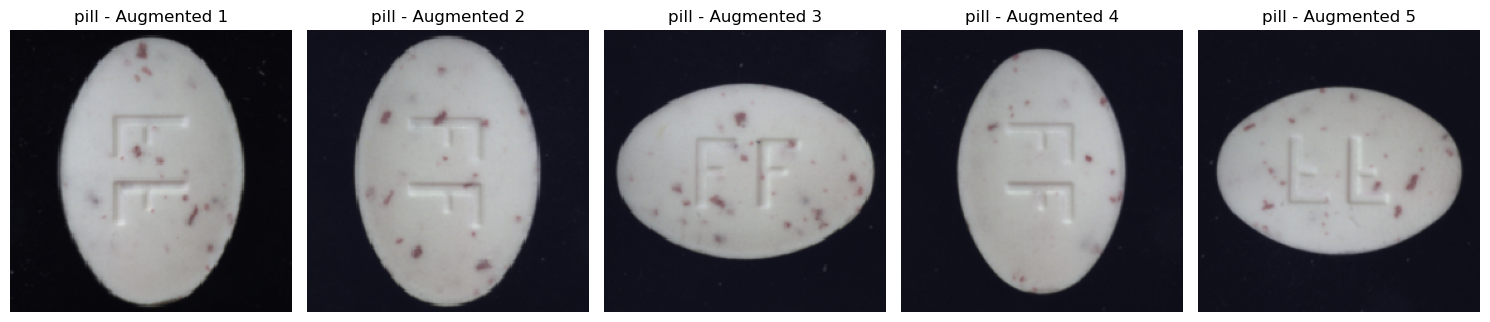

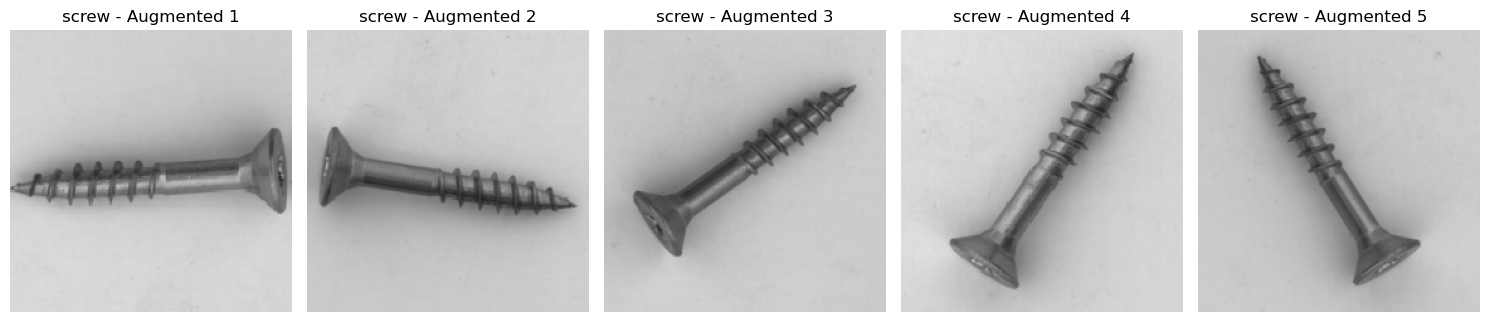

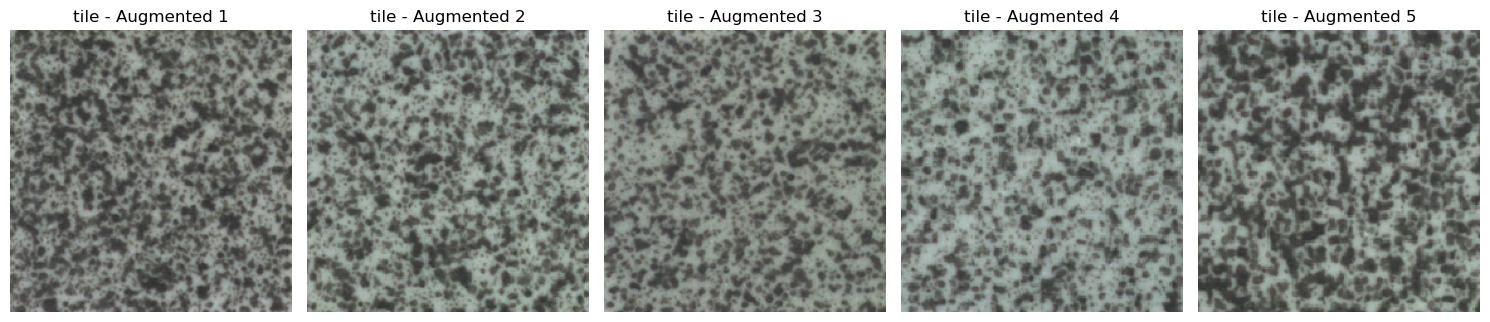

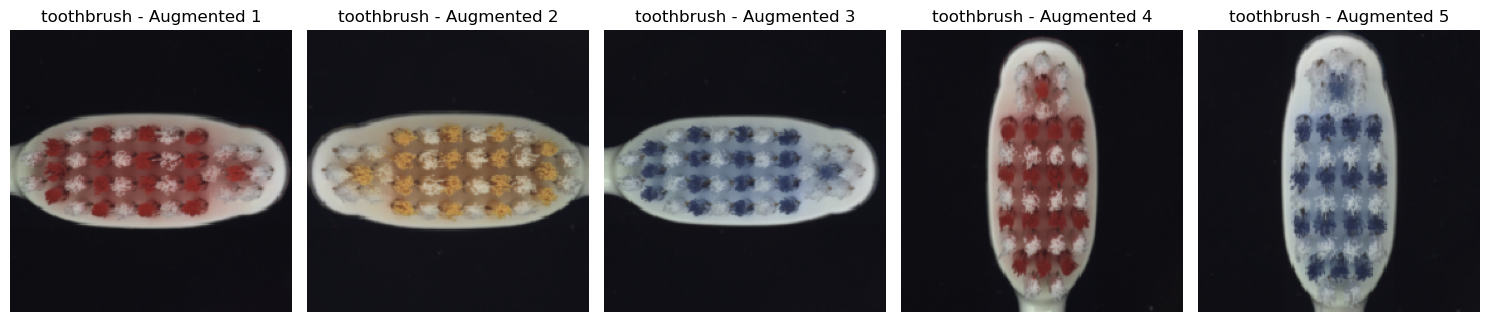

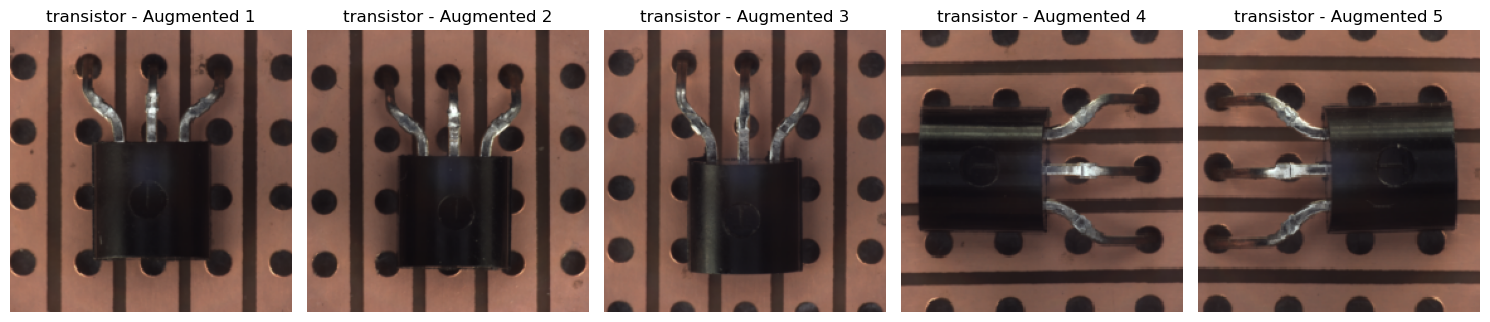

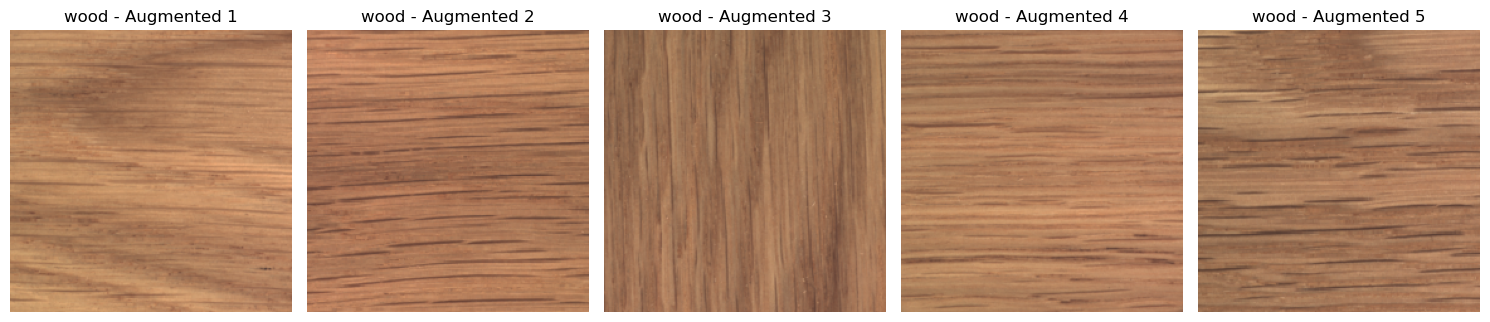

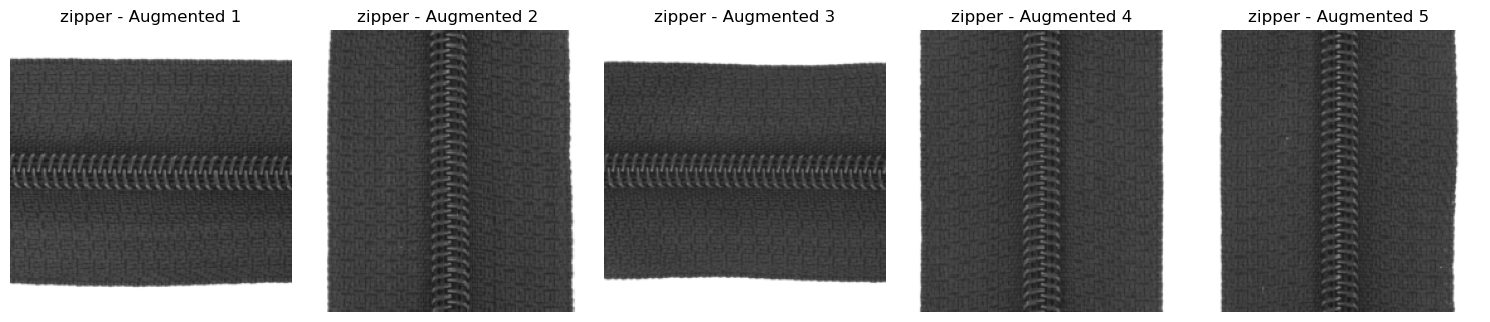

In [ ]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import os

# --- ✅ Custom Salt & Pepper Noise Class ---
    
class Rotate(object):
    def __init__(self, angles=[90, 180]):
        self.angles = angles

    def __call__(self, img):
        angle = random.choice(self.angles)
        return img.rotate(angle)

# --- ✅ Augmentation Pipeline (Ensures All Outputs Are Tensors) ---
transform_augmentation = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fixed shape
    transforms.RandomHorizontalFlip(p=0.5),  # 50% probability of horizontal flip
    transforms.RandomApply([transforms.RandomAffine(degrees=0, translate=(0.00, 0.00), scale=(1, 1.15))], p=0.75),  # Random translation and scaling
    transforms.RandomApply([Rotate(angles=[-90, 90, 180])  # Apply rotation with specified angles
                            ], p=0.75),  # 75% probability of applying rotation
    transforms.GaussianBlur(kernel_size=3, sigma=(0.01, 0.05)),  # Apply Gaussian blur
    transforms.ToTensor(),  # Convert to PyTorch tensor before batching
])




# Function to display random augmented images in a grid
def display_random_augmented_images(category, num_images=5):
    train_image_path = os.path.join(dataset_dir, category, 'train', 'good')
    
    try:
        images = [os.path.join(train_image_path, img) for img in os.listdir(train_image_path) if img.endswith('.png')]
        if len(images) == 0:
            print(f"No images found in {train_image_path}")
            return
    except PermissionError as e:
        print(f"PermissionError: {e}")
        return

    random_images = random.sample(images, min(len(images), num_images))
    
    cols = 5  # Number of columns in the grid
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # Flatten axes if there is only one row
    if rows == 1:
        axes = axes.flatten()
    else:
        axes = axes.reshape(rows, cols)

    for i, img_path in enumerate(random_images):
        img = Image.open(img_path).convert("RGB")
        
        augmented_image = transform_augmentation(img)  # Apply general transformations
        
        if rows == 1:
            ax = axes[i]  # 1D array case
        else:
            ax = axes[i // cols, i % cols]  # 2D array case
        ax.imshow(augmented_image.numpy().transpose(1, 2, 0))
        ax.set_title(f"{category} - Augmented {i+1}")
        ax.axis('off')

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes.flatten()[j])  # Flatten first to avoid indexing issues

    plt.tight_layout()
    plt.show()

# Example usage for a specific category
for category in categories:
    display_random_augmented_images(category, num_images=5)


## *3. Loading and Transforming Image Data with PyTorch*

In this section, we load the training images for each category using **`ImageFolder`** from the `torchvision.datasets` module, and apply basic transformations to them.


#### 1. **Transformation Pipeline**:
   - The transformation pipeline is defined using `torchvision.transforms.Compose`. This ensures that every image in the dataset undergoes the same preprocessing steps.
     - **Resize**: The images are resized to a fixed shape of **224x224 pixels**, which is a common size for models like ResNet, VGG, etc.
     - **ToTensor**: Converts the images into PyTorch tensors, allowing them to be used as input to PyTorch models.

#### 2. **Loading Datasets**:
   - A dictionary, **`train_original_datasets_dict`**, is created to store the training datasets for each category.
   - For each category, the **`ImageFolder`** class is used to load images from the directory structure:
     - The `root` parameter specifies the path to the training images.
     - The `transform` parameter applies the transformations defined earlier (resize and conversion to tensor).

#### 3. **Storing Datasets**:
   - For each category, the transformed dataset is stored in the dictionary **`train_original_datasets_dict`** under the category name.


In [29]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

# Define the transformation pipeline using torchvision.transforms.Compose
#it is the basic transfom for original train dataset and test dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor()  # Convert the image to a PyTorch tensor  
])



train_original_datasets_dict = {}

# Iterate through each category and load the train and test datasets
for category in categories:
    
    train_original_image_path = os.path.join(dataset_dir, category, 'train')

    train_original_dataset = ImageFolder(root=train_original_image_path, transform=transform)
    
    train_original_datasets_dict[category] = train_original_dataset


## *4. Augmenting Training Images and Saving to a New Directory*

In this section, we augment the training images by applying transformations, and store the augmented images in a separate directory for each category. This process modifies 75% of the images in the dataset while leaving 25% untouched.


#### 1. **Directory Setup**:
   - For each category, a new subdirectory **`train-augmented/good`** is created to store the augmented images. If the folder already exists, it is first deleted using **`shutil.rmtree`** to avoid any conflicts from previous runs.

#### 2. **Selecting Images**:
   - The original training images are loaded from **`train_original_datasets_dict`**, which contains datasets for each category. The image paths are extracted from the dataset and stored in the list **`image_paths`**.

#### 3. **Augmentation Logic**:
   - We apply augmentation to a subset of the images:
     - **Total Augmented Images**: The process runs until a total of **1500 augmented images** are generated for each category.
     - **Augmentation**: For each image in **`image_paths`**, a transformation is applied using **`transform_augmentation`**. This transformation is defined earlier and includes random augmentations like rotation, flipping, etc.
     - **Saving the Augmented Image**: The augmented image, which is in tensor form, is converted back to a PIL image using **`ToPILImage`** and saved with a unique name in the augmented directory.

#### 4. **Ensuring No Overwrites**:
   - Each augmented image is given a unique name by appending a prefix (`aug_idx`) to the original image name to prevent overwriting of files.

#### 5. **Completion**:
   - The loop continues until the total number of augmented images reaches 1500 for each category, after which the process is complete.


In [35]:
import os
import torch
import numpy as np
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.transforms import ToPILImage
import shutil

# --- ✅ Augmentation Runs on 100% of the cases ---
for category, dataset in train_original_datasets_dict.items():
    train_image_augmented_path = os.path.join(dataset_dir, category, "train-augmented", "good")
    if os.path.exists(train_image_augmented_path):
        shutil.rmtree(train_image_augmented_path)
    os.makedirs(train_image_augmented_path, exist_ok=True)  # Create subdirectory for category

    image_paths = [sample[0] for sample in dataset.samples]

    total_augmented_images = 1500
    aug_idx = 0

    while aug_idx < total_augmented_images:
        for image_path in image_paths:
            if aug_idx >= total_augmented_images:
                break
            image = Image.open(image_path).convert("RGB")
            image_tensor = transform_augmentation(image)  # Apply augmentation
            aug_type = f"aug_{aug_idx}"

            image_pil = ToPILImage()(image_tensor)  # Convert tensor back to PIL for saving
            image_name = os.path.basename(image_path)
            save_path = os.path.join(train_image_augmented_path, f"{aug_type}_{image_name}")
            image_pil.save(save_path)
            aug_idx += 1

print("✅ Augmented dataset created successfully!")


✅ Augmented dataset created successfully!
